## Exploring Global Happiness 🌍😊

This project, undertaken by third-year **Computer Science** students at the University of Havana, focuses on a comprehensive **statistical analysis** of the **World Happiness Index** across 159 countries. The primary objective is to explore and understand the factors influencing happiness on a global scale. Through this study, we will employ a range of statistical techniques, including:

* **Descriptive statistics** to summarize the data
* **Inferential statistics** to draw conclusions about the population
* **Hypothesis testing** to validate our assumptions

Additionally, we will perform *value estimations* and analyze the relationships between various **socio-economic factors** and happiness scores. This project aims to provide valuable insights into the determinants of happiness and contribute to the broader understanding of global well-being. 🌍📊

> Javier Alejandro González Díaz C-312

> Kevin Márquez Vega C-312

> José Miguel Leyva de la Cruz C-312

### Importando librerías necesarias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

# Celda 1: Importar librerías
import matplotlib.pyplot as plt

# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

## Cargando el DataSet sobre un Ranking de Felicidad Mundial tomado en 159 países diferentes

In [2]:
df = pd.read_csv('2019.csv')

### Exploración inicial del DataSet

In [4]:
df.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

### Limpieza de datos
(Manejar valores nulos)

In [10]:
df = df.dropna()

### Análisis exploratorio de datos (EDA) 

> Distribución normal del Happinness Score

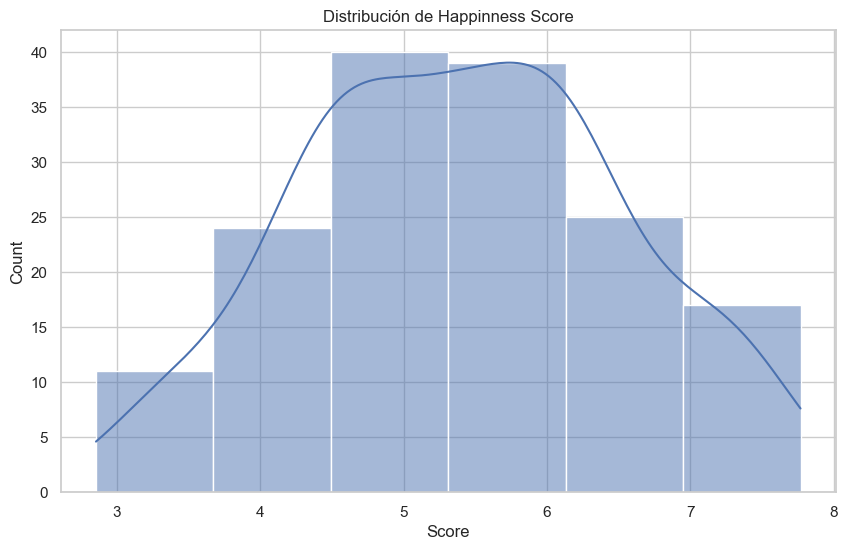

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True,binwidth=0.8)
plt.title('Distribución de Happinness Score')
plt.show()

### Gráfico de dispersión entre dos columnas

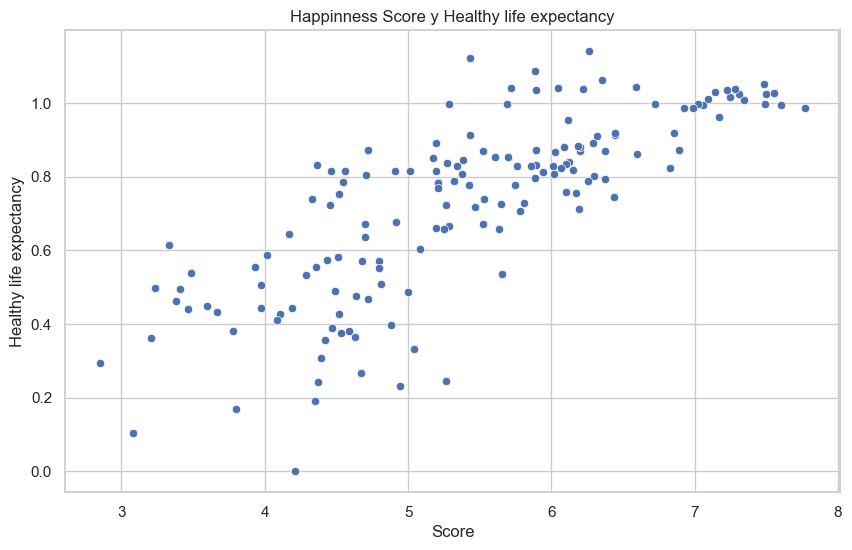

In [6]:
# Gráfico de dispersión entre dos columnas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Healthy life expectancy', data=df)
plt.title('Happinness Score y Healthy life expectancy')
plt.show()

### Análisis estadísticos específicos
Correlación entre variables

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Prueba de hipótesis (Ejemplo: prueba t de dos muestras)
grupo1 = df[df['grupo'] == 'A']['columna_interes']
grupo2 = df[df['grupo'] == 'B']['columna_interes']
t_stat, p_value = ttest_ind(grupo1, grupo2)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

### Conclusiones

In [ ]:
print("Conclusiones y hallazgos del análisis")
# Celda 8: Guardar el dataset limpio
df.to_csv('ruta/a/tu/dataset_limpio.csv', index=False)

## Visualización adicional
### Boxplot de una columna

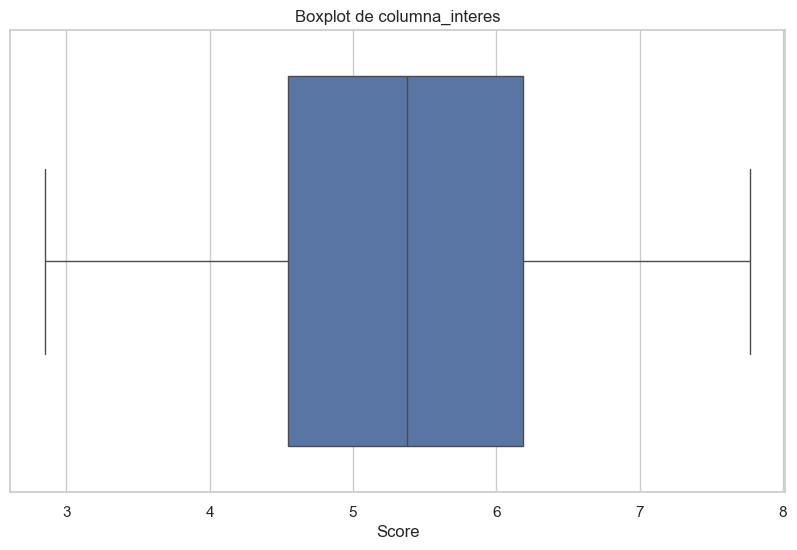

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', data=df)
plt.title('Boxplot de columna_interes')
plt.show()

### Análisis adicional
## Análisis de la media y la mediana de una columna

In [ ]:
mean_value = df['Score'].mean()
median_value = df['Score'].median()
print(f'Media de columna_interes: {mean_value}')
print(f'Mediana de columna_interes: {median_value}')